<a href="https://colab.research.google.com/github/anupa35/Machine-Learning/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2**



# 1. Data Preprocessing

##1.1 Initial Preprocessing steps

In [7]:
import pandas as pd
import numpy as np

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # changing incorrect data type of TotalCharges
df.isnull().sum() # checking for null values

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [13]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median()) # Handling missing values of TotalCharges

In [14]:
df.isnull().sum() # checking for null values again

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [15]:
df = df.drop(columns=['customerID']) # removing the customerID column since it is not useful

In [16]:
# converting Yes/No containing columns into 1/0 values
columnswith_YesNo = ['Partner', 'Dependents', 'PhoneService','PaperlessBilling', 'Churn']

for col in columnswith_YesNo:
    df[col] = df[col].map({'Yes':1, 'No':0})

In [17]:
# converting gender column data into 1/0
df['gender'] = df['gender'].map({'Male':1, 'Female':0})

##1.2 Feature Engineering

In [18]:
service_cols = [
    'PhoneService','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies'
]

df["num_services"] = df[service_cols].apply(lambda row: (row=='Yes').sum(), axis=1)

In [19]:
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[0, 6, 12, 24, 48, 72],
    labels=["0-6","6-12","12-24","24-48","48-72"],
    include_lowest=True
)

In [20]:
df["charge_ratio"] = df["MonthlyCharges"] / (df["TotalCharges"] + 1)

In [21]:
df["avg_monthly_spend"] = df["TotalCharges"] / (df["tenure"] + 1)

In [22]:
df["is_fiber"] = (df["InternetService"] == "Fiber optic").astype(int)

In [23]:
df["is_monthly"] = (df["Contract"] == "Month-to-month").astype(int)

##1.3 Final preprocessing steps

In [24]:
columns_multicatego = [
    'InternetService','Contract','PaymentMethod','MultipleLines',
    'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
    'StreamingTV','StreamingMovies','tenure_group'
]

columns_numeric = [
    'tenure','MonthlyCharges','TotalCharges','num_services',
    'charge_ratio','avg_monthly_spend'
]

In [25]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor_nn = ColumnTransformer([
    ('categorical', OneHotEncoder(handle_unknown='ignore'), columns_multicatego),
    ('numeric', StandardScaler(), columns_numeric)
], remainder='passthrough')

preprocessor_tree = ColumnTransformer([
    ('categorical', OneHotEncoder(handle_unknown='ignore'), columns_multicatego),
    ('numeric', 'passthrough', columns_numeric)
], remainder='passthrough')

X_train_nn = preprocessor_nn.fit_transform(X_train)
X_test_nn = preprocessor_nn.transform(X_test)

X_train_tree = preprocessor_tree.fit_transform(X_train)
X_test_tree = preprocessor_tree.transform(X_test)

# Neural Network (MLP)

In [27]:
!pip install keras-tuner --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 4.1 MB/s eta 0:00:00


In [28]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras import Input

In [29]:
input_dim = X_train_nn.shape[1]

In [30]:
def build_model(hp):

    model = Sequential()
    model.add(Input(shape=(input_dim,)))

    # 1 to 4 Dense layers
    for i in range(hp.Int("num_layers", 1, 4)):
        units = hp.Int(f"units_{i}", min_value=32, max_value=256, step=64)
        model.add(Dense(units, activation="relu"))

        if hp.Boolean(f"batchnorm_{i}"):
            model.add(BatchNormalization())

        dropout_rate = hp.Float(f"dropout_{i}", 0.0, 0.4, step=0.1)
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation="sigmoid"))

    # learning rate choices
    lr = hp.Choice("learning_rate", [1e-3, 7e-4, 5e-4])
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [31]:
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=15,
    factor=3,
    directory='churn_tuning',
    project_name='telco_fast'
)

In [32]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [33]:
tuner.search(
    X_train_nn,
    y_train,
    validation_split=0.2,
    epochs=15,
    callbacks=[early_stop],
    class_weight={0:1, 1:2},
    batch_size=32
)

Trial 30 Complete [00h 00m 09s]
val_loss: 0.45623162388801575

Best val_loss So Far: 0.44465699791908264
Total elapsed time: 00h 02m 54s


In [34]:
best_model = tuner.get_best_models(num_models=1)[0]

best_hparams = tuner.get_best_hyperparameters()[0]

print("Best Hyperparameters:")
for hp_name in best_hparams.values.keys():
    print(hp_name, ":", best_hparams.get(hp_name))

Best Hyperparameters:
num_layers : 1
units_0 : 224
batchnorm_0 : False
dropout_0 : 0.0
learning_rate : 0.0007
units_1 : 160
batchnorm_1 : True
dropout_1 : 0.30000000000000004
units_2 : 96
batchnorm_2 : True
dropout_2 : 0.30000000000000004
units_3 : 160
batchnorm_3 : False
dropout_3 : 0.30000000000000004
tuner/epochs : 2
tuner/initial_epoch : 0
tuner/bracket : 2
tuner/round : 0


In [35]:
# Predictions
y_pred_prob = best_model.predict(X_test_nn)
y_pred = (y_pred_prob > 0.42).astype(int)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay


Confusion Matrix:
[[804 231]
 [ 91 283]]


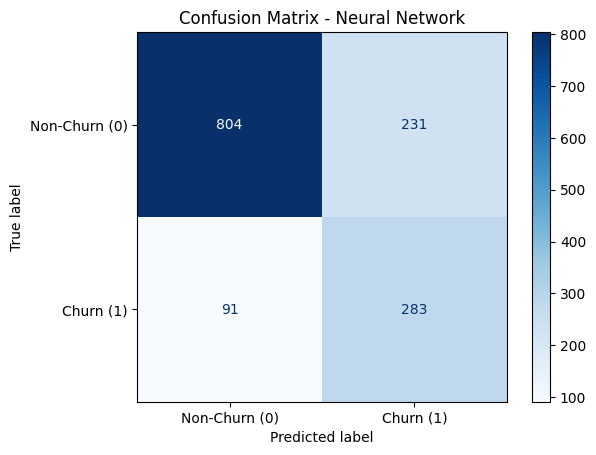

In [37]:
# Evaluation
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Churn (0)', 'Churn (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.show()

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='macro')
recall    = recall_score(y_test, y_pred,average='macro')
f1        = f1_score(y_test, y_pred,average='macro')

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

Accuracy : 0.7714691270404542
Precision: 0.7244538399669587
Recall   : 0.7667480430907541
F1 Score : 0.7352740045745227

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1035
           1       0.55      0.76      0.64       374

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409


ROC AUC Score: 0.8462398925314526


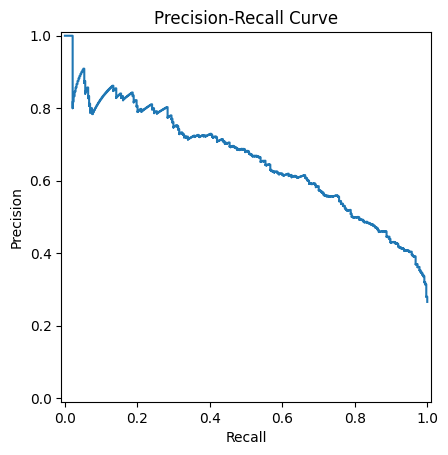

In [39]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_display.plot()
plt.title('Precision-Recall Curve')
plt.show()

# Decision Tree

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier(class_weight={0:1,1:2}, random_state=42)

In [42]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [43]:
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_tree, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 2},
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='roc_auc', verbose=1)

In [44]:
print("Best parameters:", grid_search.best_params_)

best_dt = grid_search.best_estimator_
best_dt.fit(X_train_tree, y_train)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


DecisionTreeClassifier(class_weight={0: 1, 1: 2}, max_depth=5,
                       min_samples_leaf=10, random_state=42)

In [45]:

y_pred_tree = best_dt.predict(X_test_tree)
y_pred_prob_tree = best_dt.predict_proba(X_test_tree)[:, 1]


Confusion Matrix:
[[795 240]
 [ 89 285]]


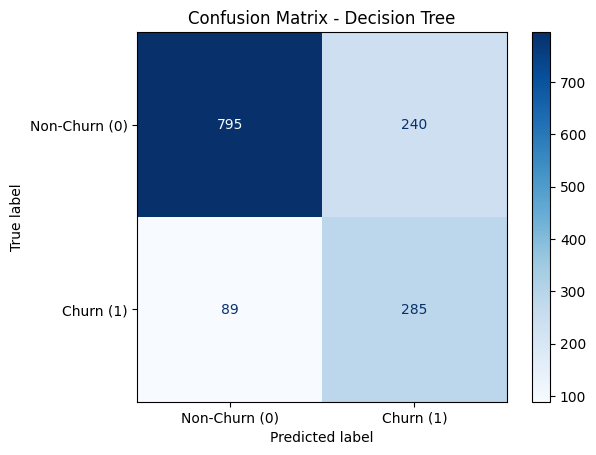

In [46]:

cm1 = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix:")
print(cm1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Non-Churn (0)', 'Churn (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy  = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree,average='macro')
recall    = recall_score(y_test, y_pred_tree,average='macro')
f1        = f1_score(y_test, y_pred_tree,average='macro')

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)


print(classification_report(y_test, y_pred_tree))


print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_tree))


Accuracy : 0.7665010645848119
Precision: 0.7210892049127343
Recall   : 0.7650740137952414
F1 Score : 0.7312971798321451
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1035
           1       0.54      0.76      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.80      0.77      0.78      1409

ROC AUC Score: 0.8343886434679274


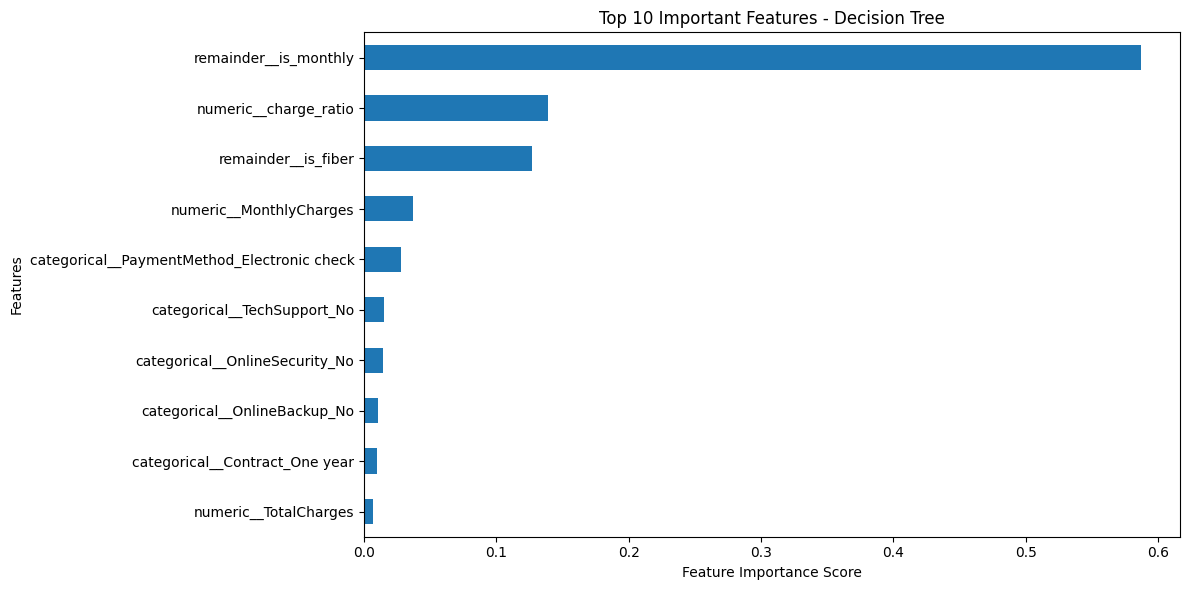

Top 10 Most Important Features:
remainder__is_monthly                          0.587321
numeric__charge_ratio                          0.139048
remainder__is_fiber                            0.127199
numeric__MonthlyCharges                        0.036757
categorical__PaymentMethod_Electronic check    0.027768
categorical__TechSupport_No                    0.014896
categorical__OnlineSecurity_No                 0.014599
categorical__OnlineBackup_No                   0.010799
categorical__Contract_One year                 0.009348
numeric__TotalCharges                          0.006472
dtype: float64


In [52]:
feature_names = preprocessor_tree.get_feature_names_out()

feature_importances = pd.Series(best_dt.feature_importances_, index=feature_names)
top_10_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_features.sort_values().plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Important Features - Decision Tree')
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(top_10_features)

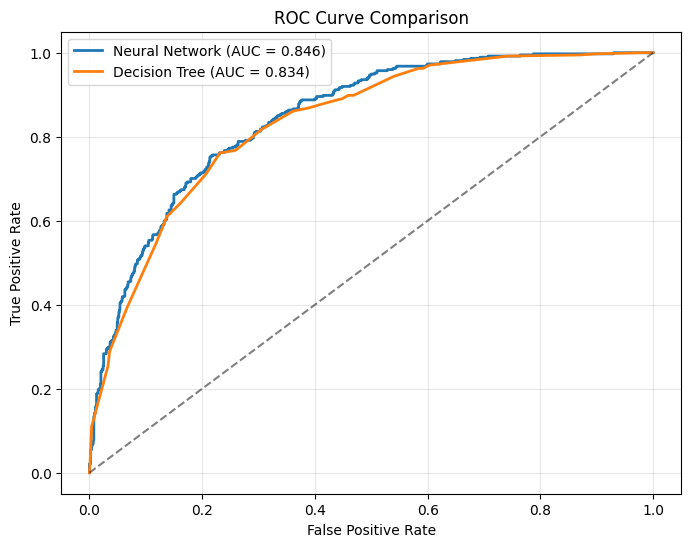

In [53]:
from sklearn.metrics import roc_curve

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_tree)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_score(y_test, y_pred_prob):.3f})', linewidth=2)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_pred_prob_tree):.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

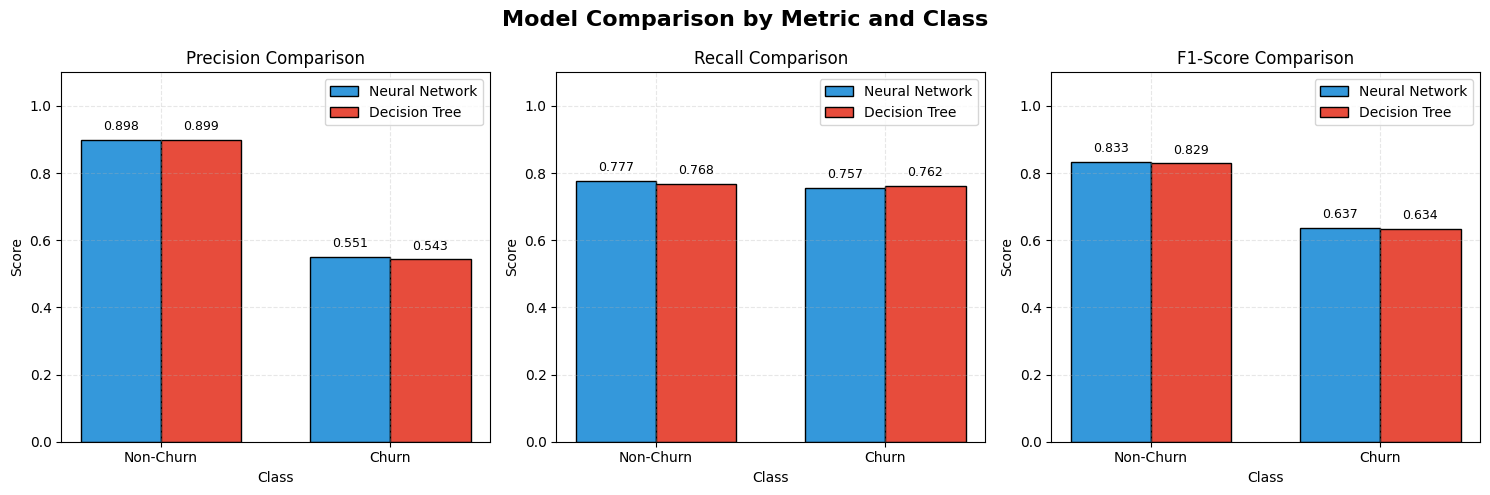

In [55]:

nn_report = classification_report(y_test, y_pred, output_dict=True)
dt_report = classification_report(y_test, y_pred_tree, output_dict=True)


classes = ['Class 0', 'Class 1']
metrics = ['precision', 'recall', 'f1-score']


nn_scores = {
    'precision': [nn_report['0']['precision'], nn_report['1']['precision']],
    'recall': [nn_report['0']['recall'], nn_report['1']['recall']],
    'f1-score': [nn_report['0']['f1-score'], nn_report['1']['f1-score']]
}

dt_scores = {
    'precision': [dt_report['0']['precision'], dt_report['1']['precision']],
    'recall': [dt_report['0']['recall'], dt_report['1']['recall']],
    'f1-score': [dt_report['0']['f1-score'], dt_report['1']['f1-score']]
}


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Model Comparison by Metric and Class', fontsize=16, fontweight='bold')


x = np.arange(len(classes))
width = 0.35


colors = ['#3498db', '#e74c3c']
model_names = ['Neural Network', 'Decision Tree']

for i, metric in enumerate(metrics):
    ax = axes[i]

    bars1 = ax.bar(x - width/2, nn_scores[metric], width,
                   label='Neural Network', color=colors[0], edgecolor='black')
    bars2 = ax.bar(x + width/2, dt_scores[metric], width,
                   label='Decision Tree', color=colors[1], edgecolor='black')

    ax.set_xlabel('Class')
    ax.set_ylabel('Score')
    ax.set_title(f'{metric.title()} Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(['Non-Churn', 'Churn'])
    ax.set_ylim(0, 1.1)
    ax.legend()
    ax.grid(True, alpha=0.3, linestyle='--')

    for bar in bars1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

    for bar in bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()